In [1]:
%%capture
# Use Python 3.10 and this transformers==4.40.1 for stable compatibility
! pip install transformers==4.40.1

In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM
from google.colab import files

In [27]:

# load model and dataset
model = AutoModelForCausalLM.from_pretrained('thuml/timer-base-84m', trust_remote_code=True)
#df = pd.read_csv("https://raw.githubusercontent.com/WenWeiTHU/TimeSeriesDatasets/refs/heads/main/ETT-small/ETTh2.csv")
df = pd.read_csv("https://raw.githubusercontent.com/Mujtaba-Khawari/data-csv/main/2001.csv")
len(df)
df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,DATA,FLOW
0,1/1/2001,6.45
1,1/2/2001,6.45
2,1/2/2001,5.40
3,1/2/2001,4.62
4,1/3/2001,6.18
...,...,...
1684,12/29/2001,2.26
1685,12/29/2001,0.43
1686,12/29/2001,1.22
1687,12/30/2001,2.35


In [20]:
# perpare input
# perpare input
lookback_length =512    # support the maximum context length up to 2880
#seqs = torch.tensor(df["Pre"][:lookback_length]).unsqueeze(0).float() orginal code
#series = df["FLOW"][:lookback_length] orginal code
series = df["FLOW"][1075:1587]
series = pd.to_numeric(series, errors='coerce')
seqs = torch.tensor(series.values, dtype=torch.float32).unsqueeze(0)
seqs.shape

torch.Size([1, 512])

In [21]:
# generate forecast
prediction_length = 102    # forecast the next 96 timestamps, supporting maximum prediction length encompassed in the context length
output = model.generate(seqs, max_new_tokens=prediction_length)
output = output.squeeze(0).detach().numpy()
output

array([ 7.8042984,  7.6988497,  7.5715175,  7.459818 ,  7.4997263,
        7.4622297,  7.5700197,  7.467748 ,  7.5420237,  7.484856 ,
        7.331493 ,  7.2203565,  7.1039624,  6.9764733,  6.817208 ,
        6.4236937,  6.14022  ,  5.9285226,  5.853426 ,  5.8723154,
        6.065175 ,  6.117852 ,  6.0194316,  6.2273383,  6.324746 ,
        6.197391 ,  6.0361195,  6.084316 ,  6.0537314,  6.1014247,
        6.262532 ,  6.3251247,  6.4272995,  6.5288987,  6.7057285,
        6.82     ,  6.872842 ,  6.8108163,  7.0188375,  6.932399 ,
        6.9634895,  7.1268964,  7.566562 ,  7.652714 ,  7.911411 ,
        7.9840274,  7.990265 ,  8.229767 ,  8.218981 ,  8.267826 ,
        8.378126 ,  8.623608 ,  8.832561 ,  9.141303 ,  9.666604 ,
       10.197634 , 10.649292 , 10.846726 , 11.116496 , 11.322851 ,
       11.308872 , 11.504616 , 11.525079 , 11.653909 , 11.918748 ,
       12.5029745, 13.6063595, 14.196601 , 14.716823 , 14.814811 ,
       14.621631 , 14.64049  , 14.545647 , 14.470924 , 14.5063

In [22]:
print(output.shape)

(102,)


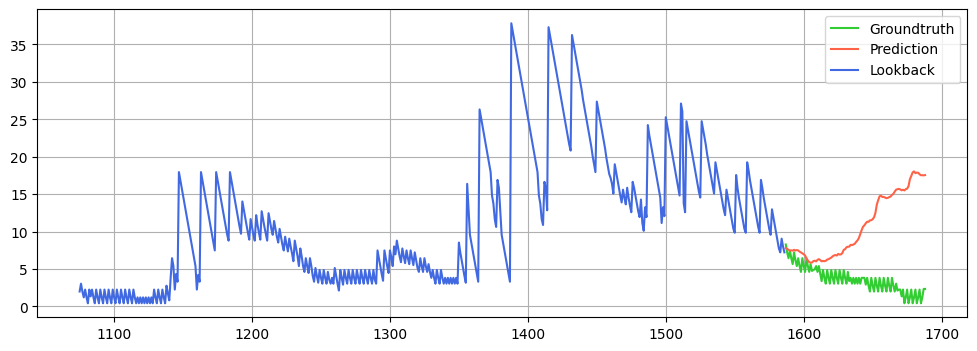

In [32]:
# plot the prediction

#plt.figure(figsize=(12, 4))
#plt.plot(df["FLOW"][:lookback_length + prediction_length], color="limegreen", label="Groundtruth")orginal
#plt.plot(range(lookback_length, lookback_length + prediction_length), output, color="tomato", label="Prediction")
#plt.plot(df["FLOW"][:lookback_length], color="royalblue", label="Lookback")
#plt.legend()
#plt.grid()
#plt.show()



plt.figure(figsize=(12, 4))
plt.plot(df["FLOW"][1587:1689], color="limegreen", label="Groundtruth")
plt.plot( range(1587, 1689),output, color="tomato", label="Prediction")
plt.plot(df["FLOW"][1075:1587], color="royalblue", label="Lookback")
plt.legend()
plt.grid()
plt.show()